In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [14]:
saves_dir = 'saves_rdb8'

In [15]:
res_dict = dict()
for fname in Path(saves_dir).glob('*.pickle'):
    
    res_dict[fname.name] = dict()
    
    with open(fname, 'rb') as handle:
        data = pickle.load(handle)

        res_dict[fname.name]['rmse'] = np.array(data['rmse'])
        res_dict[fname.name]['total_time'] = np.array(data['total_time'])
        res_dict[fname.name]['inv_time'] = np.array(data['inv_time'])

# Pseudoinverse

In [16]:
res = {'rmse': [], 'total_time': [], 'inv_time': []}
for el in res_dict:
    if 'pseudoinverse' in el:
        res['rmse'].append(res_dict[el]['rmse'])
        res['total_time'].append(res_dict[el]['total_time'])
        res['inv_time'].append(res_dict[el]['inv_time'])

res['rmse'] = np.vstack(res['rmse'])
res['total_time'] = np.vstack(res['total_time'])
res['inv_time'] = np.vstack(res['inv_time'])

res_pseudoinverse = res

Text(0, 0.5, 'rmse')

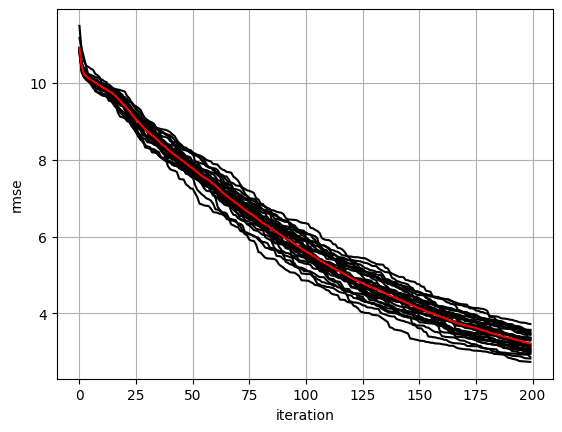

In [17]:
plt.plot(res_pseudoinverse['rmse'].T, c='k')
plt.plot(res_pseudoinverse['rmse'].mean(axis=0), c='r')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('rmse')

Text(0, 0.5, 'cumulative total time')

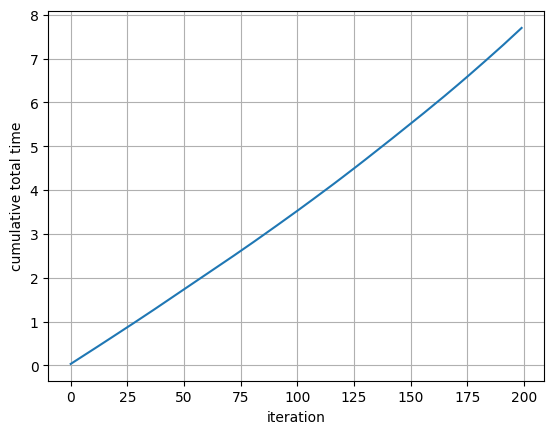

In [18]:
plt.plot(np.cumsum(res_pseudoinverse['total_time'], axis=1).mean(axis=0))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('cumulative total time')

Text(0, 0.5, 'cumulative inversion time')

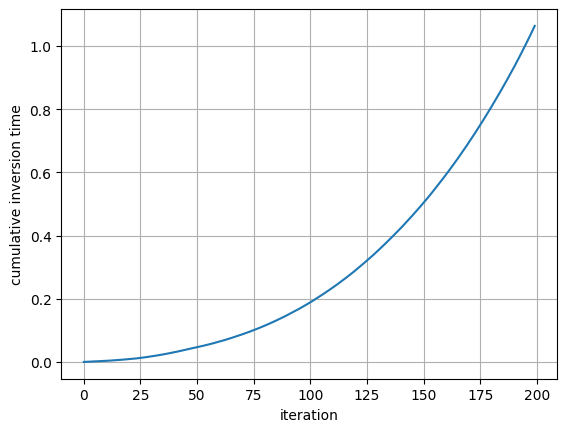

In [19]:
plt.plot(np.cumsum(res_pseudoinverse['inv_time'], axis=1).mean(axis=0))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('cumulative inversion time')

# QR update

In [20]:
res = {'rmse': [], 'total_time': [], 'inv_time': []}
for el in res_dict:
    if 'qr_update' in el:
        res['rmse'].append(res_dict[el]['rmse'])
        res['total_time'].append(res_dict[el]['total_time'])
        res['inv_time'].append(res_dict[el]['inv_time'])

res['rmse'] = np.vstack(res['rmse'])
res['total_time'] = np.vstack(res['total_time'])
res['inv_time'] = np.vstack(res['inv_time'])

res_qr_update = res

# Batch update

In [21]:
res = {'rmse': [], 'total_time': [], 'inv_time': []}
for el in res_dict:
    if 'update_batch' in el:
        res['rmse'].append(res_dict[el]['rmse'])
        res['total_time'].append(res_dict[el]['total_time'])
        res['inv_time'].append(res_dict[el]['inv_time'])

res['rmse'] = np.vstack(res['rmse'])
res['total_time'] = np.vstack(res['total_time'])
res['inv_time'] = np.vstack(res['inv_time'])

res_batch_update = res

# Draw

Text(0, 0.5, 'rmse')

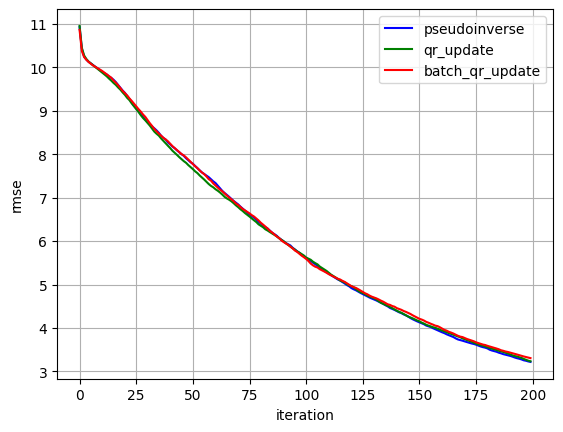

In [22]:
plt.plot(res_pseudoinverse['rmse'].mean(axis=0), c='b', label='pseudoinverse')
plt.plot(res_qr_update['rmse'].mean(axis=0), c='g', label='qr_update')
plt.plot(res_batch_update['rmse'].mean(axis=0), c='r', label='batch_qr_update')
plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('rmse')

Text(0, 0.5, 'cumulative total time')

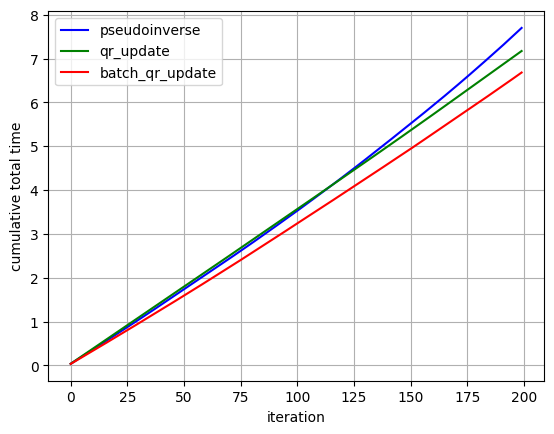

In [23]:
plt.plot(np.cumsum(res_pseudoinverse['total_time'], axis=1).mean(axis=0), c='b', label='pseudoinverse')
plt.plot(np.cumsum(res_qr_update['total_time'], axis=1).mean(axis=0), c='g', label='qr_update')
plt.plot(np.cumsum(res_batch_update['total_time'], axis=1).mean(axis=0), c='r', label='batch_qr_update')
plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cumulative total time')

Text(0, 0.5, 'cumulative inversion time')

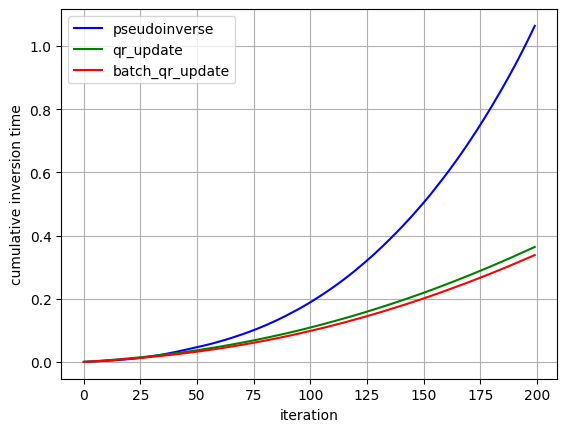

In [24]:
plt.plot(np.cumsum(res_pseudoinverse['inv_time'], axis=1).mean(axis=0), c='b', label='pseudoinverse')
plt.plot(np.cumsum(res_qr_update['inv_time'], axis=1).mean(axis=0), c='g', label='qr_update')
plt.plot(np.cumsum(res_batch_update['inv_time'], axis=1).mean(axis=0), c='r', label='batch_qr_update')
plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cumulative inversion time')